In [1]:
# -*- coding: utf-8 -*-

import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
from google.colab import drive
import os

def fetch_and_save_data(asset_type, asset_pair, start_date, end_date, folder_name, interval='1d'):
    # Mount Google Drive
    drive.mount('/content/drive')

    # Create a folder in Google Drive if it doesn't exist
    folder_path = f'/content/drive/My Drive/{folder_name}'
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    # Determine ticker format based on asset type
    if asset_type == 'crypto':
        ticker = asset_pair  # E.g., 'BTC-USD'
    elif asset_type == 'forex':
        ticker = asset_pair + "=X"  # Forex pairs like 'EURUSD=X'
    elif asset_type == 'stock':
        ticker = asset_pair  # Stock tickers like 'AAPL', 'GOOGL'
    else:
        raise ValueError("Invalid asset type. Choose 'crypto', 'forex', or 'stock'.")

    # Fetch the data
    data = yf.download(ticker, start=start_date, end=end_date, interval=interval)

    # Ensure Date-Time is included in the DataFrame
    data.reset_index(inplace=True)

    # Select only the required columns ('Date' and 'Close')
    data = data[['Date', 'Close']]

    # Convert 'Date' to just the date (without time)
    data['Date'] = data['Date'].dt.date

    # Define the file path with the current date and additional terms in the filename
    current_date_str = datetime.today().strftime('%Y-%m-%d')
    file_path = os.path.join(folder_path, f'{asset_pair}_{current_date_str}_{start_date}_to_{end_date}_{asset_type}_data.csv')

    # Save the data to CSV
    data.to_csv(file_path, index=False)
    print(f"Data saved to {file_path}")

def get_user_input():
    print("Choose the asset type you want to fetch data for:")
    print("1. Cryptocurrency (e.g., BTC-USD, ETH-USD)")
    print("2. Forex (e.g., EURUSD, GBPUSD)")
    print("3. Stock (e.g., AAPL, GOOGL)")

    asset_type_choice = input("Enter the number corresponding to your choice: ").strip()

    if asset_type_choice == '1':
        asset_type = 'crypto'
        asset_pair = input("Enter the cryptocurrency pair (e.g., BTC-USD): ").strip()
    elif asset_type_choice == '2':
        asset_type = 'forex'
        asset_pair = input("Enter the forex pair (e.g., EURUSD): ").strip()
    elif asset_type_choice == '3':
        asset_type = 'stock'
        asset_pair = input("Enter the stock ticker (e.g., AAPL): ").strip()
    else:
        print("Invalid choice! Please select a valid option.")
        return

    # Calculate the date for 1 month ago from today
    end_date = datetime.today().strftime('%Y-%m-%d')
    start_date = (datetime.today() - timedelta(days=365)).strftime('%Y-%m-%d')

    folder_name = input("Enter the folder name in Google Drive to save the data: ").strip()

    # Fetch and save the data based on user input
    fetch_and_save_data(asset_type, asset_pair, start_date, end_date, folder_name)

# Run the function to get user input and fetch data
get_user_input()



Choose the asset type you want to fetch data for:
1. Cryptocurrency (e.g., BTC-USD, ETH-USD)
2. Forex (e.g., EURUSD, GBPUSD)
3. Stock (e.g., AAPL, GOOGL)
Enter the number corresponding to your choice: 3
Enter the stock ticker (e.g., AAPL): GOOGL
Enter the folder name in Google Drive to save the data: FinanceData
Mounted at /content/drive


[*********************100%***********************]  1 of 1 completed

Data saved to /content/drive/My Drive/FinanceData/GOOGL_2024-11-08_2023-11-09_to_2024-11-08_stock_data.csv


        Date       Close
0 2023-11-09  130.240005
1 2023-11-10  132.589996
2 2023-11-13  132.089996
3 2023-11-14  133.619995
4 2023-11-15  134.619995
Date     datetime64[ns]
Close           float64
dtype: object


(200, 2) (51, 2)
(170, 30, 1) (170,)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 30, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 30, 1)               │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 198,273 (774.50 KB)

 Trainable params: 198,273 (774.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 264ms/step - loss: 0.5712 - val_loss: 0.2750
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - loss: 0.4368 - val_loss: 0.1785
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - loss: 0.3737 - val_loss: 0.1822
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - loss: 0.3860 - val_loss: 0.1846
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - loss: 0.3488 - val_loss: 0.2494
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 196ms/step


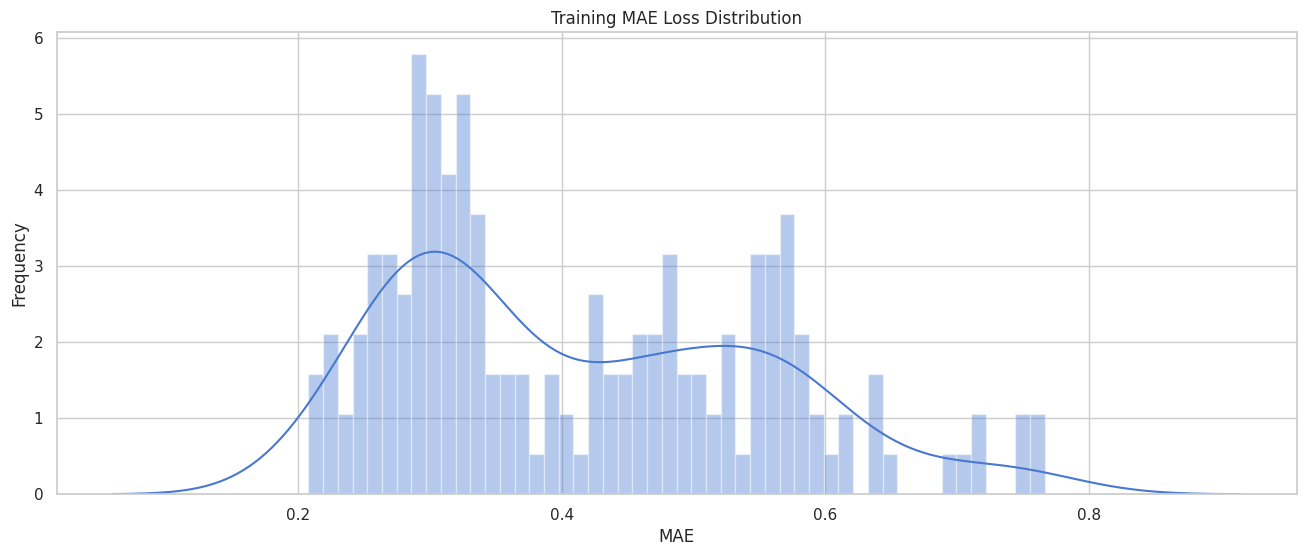

Dynamic Threshold (95th percentile): 0.27824714611117546
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


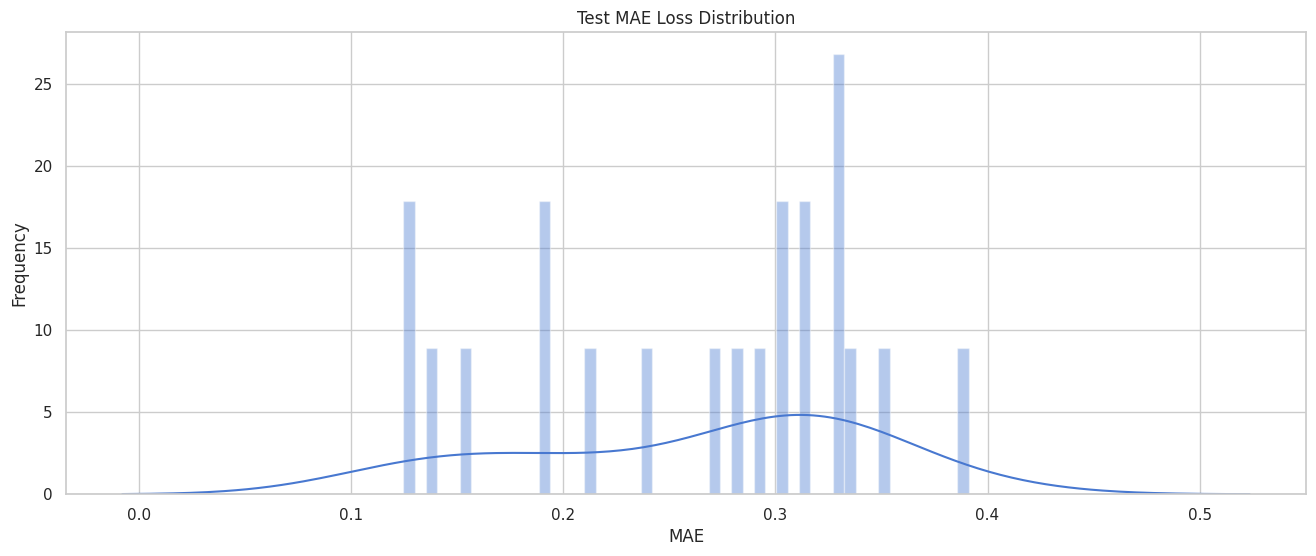

In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

sns.set(style='whitegrid', palette='muted')
rcParams['figure.figsize'] = 16, 6 # set figsize for all images

np.random.seed(1)
tf.random.set_seed(1)

file_path = '/content/drive/MyDrive/FinanceData/GOOGL_2024-11-08_2023-11-09_to_2024-11-08_stock_data.csv'
df = pd.read_csv(file_path)
#df=df.drop(index=0).reset_index(drop=True)

#print(df.head())
#df.info()/*

df = df.dropna().reset_index(drop=True)

# Convert 'Date' to datetime format and 'Close' to float
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

# Display the first few rows and the updated datatypes to confirm
print(df.head())
print(df.dtypes)

# using Plotly for interactive graphs
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='close'))
fig.update_layout(title='Market Rate', xaxis_title="Time", yaxis_title='Price', showlegend=True)
fig.show()


train_size = int(len(df) * 0.8) # 80% size for training set
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:]

print(train.shape, test.shape)

# Normalizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(train[['Close']])

train['Close'] = scaler.transform(train[['Close']])
test['Close'] = scaler.transform(test[['Close']])

def create_sequences(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 30
X_train, y_train = create_sequences(train[['Close']], train['Close'], time_steps)
X_test, y_test = create_sequences(test[['Close']], test['Close'], time_steps)

print(X_train.shape, y_train.shape)

timesteps = X_train.shape[1]
num_features = X_train.shape[2]

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed

model = Sequential()
model.add(LSTM(128, input_shape=(timesteps, num_features)))
model.add(Dropout(0.2))
model.add(RepeatVector(timesteps))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(TimeDistributed(Dense(num_features)))

model.compile(loss='mae', optimizer='adam')
model.summary()


from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, mode='min')

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stop], shuffle=False)

# saving the model for later use
model.save('anomaly_model_dynamic_threshold.keras')


# Load our saved model
model = tf.keras.models.load_model('anomaly_model_dynamic_threshold.keras')

# Calculate the MAE for training data
X_train_pred = model.predict(X_train)
train_mae_loss = pd.DataFrame(np.mean(np.abs(X_train_pred - X_train), axis=1), columns=['Error'])

# Plot the distribution of training losses
sns.distplot(train_mae_loss, bins=50, kde=True)
plt.xlabel('MAE')
plt.ylabel('Frequency')
plt.title('Training MAE Loss Distribution')
plt.show()

# Dynamic threshold based on 95th percentile
threshold = np.percentile(train_mae_loss, 15)
print(f"Dynamic Threshold (95th percentile): {threshold}")
# Calculate MAE for test data
X_test_pred = model.predict(X_test)
test_mae_loss = np.mean(np.abs(X_test_pred - X_test), axis=1)

# Plot the distribution of test losses
sns.distplot(test_mae_loss, bins=50, kde=True)
plt.xlabel('MAE')
plt.ylabel('Frequency')
plt.title('Test MAE Loss Distribution')
plt.show()

# Detect anomalies based on the dynamic threshold
test_score_df = pd.DataFrame(test[time_steps:])
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = threshold
test_score_df['anomaly'] = test_score_df['loss'] > test_score_df['threshold']
test_score_df['Close'] = test[time_steps:]['Close']

# Display the anomalies
anomalies = test_score_df[test_score_df['anomaly'] == True]
anomalies.head()

# Plot test loss and threshold
fig = go.Figure()
fig.add_trace(go.Scatter(x=test[time_steps:]['Date'], y=test_score_df['loss'], mode='lines', name='Test Loss'))
fig.add_trace(go.Scatter(x=test[time_steps:]['Date'], y=[threshold]*len(test_score_df), mode='lines', name='Dynamic Threshold'))
fig.update_layout(xaxis_title='Time', yaxis_title='Loss', showlegend=True)
fig.show()

# Plot anomalies
fig = go.Figure()

# Plot the Close Price
fig.add_trace(go.Scatter(x=test[time_steps:]['Date'],
                         y=scaler.inverse_transform(test[time_steps:]['Close'].values.reshape(-1, 1)),
                         mode='lines', name='Close Price'))

# Check if there are any anomalies to plot
if not anomalies.empty:
    # Plot anomalies as markers
    fig.add_trace(go.Scatter(x=anomalies['Date'],
                             y=scaler.inverse_transform(anomalies['Close'].values.reshape(-1, 1)),
                             mode='markers', name='Anomaly'))

fig.update_layout(title='Plotted Anomalies',
                  xaxis_title='Time', yaxis_title='Index Value',
                  showlegend=True)

fig.show()

